# Distribution of the RF predictor

For given $P$ and $\lambda$, we present the distribution of the RF predictor for the sinusoidal dataset given below.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from utils import *

# some helper functions to make the plots
def pred_fun(lambd, P, num_trials = 500):
    Y2pred_all = np.zeros((N, num_trials))
    for itr in range(num_trials):
        Y1pred, Y2pred = pred(X1, X2, Y1, P, lambd)
        Y2pred_all[:,itr] = Y2pred
    return Y2pred_all

def make_plot(Y2pred_m, Y2pred_s):
    plt.fill_between(X2, Y2pred_m - 2*Y2pred_s, Y2pred_m + 2*Y2pred_s, color='grey', alpha = 0.2)
    plt.plot(X2, Y2pred_all[:,0], 'blue', linestyle='dashed', alpha = 0.8, label='RF$')
    for k in range(1,10):
        plt.plot(X2, Y2pred_all[:,k], 'blue', linestyle='dashed', alpha = 0.8)
    plt.plot(X2, Y2pred_m, 'black', linewidth = 2.5, label='meanRF')
    plt.plot(X1, Y1, 'o', color='red', markersize=7)
    plt.xlim(0, 2*np.pi)
    plt.ylim(-3, 3)
    plt.show()

# making a sinusoidal dataset
np.random.seed(1000)
X1 = np.sort(np.random.rand(4) * 2*np.pi)
N = 100 
X2 = np.linspace(0, 2*np.pi, N) # sampling the input linearly for the interval of intereset
Y1 = np.sin(X1)
Y2 = np.sin(X2)

One can visualize the $\lambda$-RF predictor for any $P$ and $\lambda$ using the template below:

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


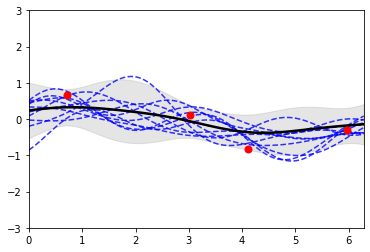

P = 2  is done.


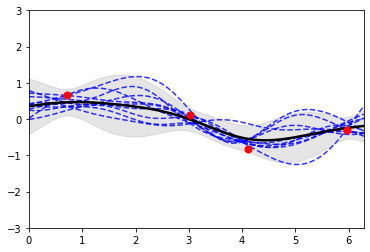

P = 4  is done.


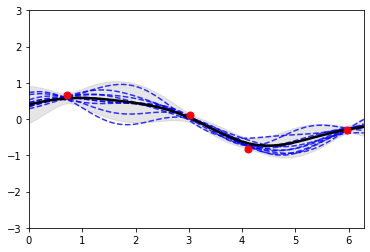

P = 10  is done.


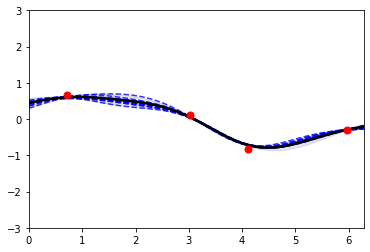

P = 100  is done.


In [2]:
P_list = [2, 4, 10, 100]

lambd = 0.1

for P in P_list:
    Y2pred_all = pred_fun(lambd, P)
    Y2pred_m = np.mean(Y2pred_all, axis=1)
    Y2pred_s = np.sqrt(np.var(Y2pred_all, axis=1))
    make_plot(Y2pred_m, Y2pred_s) # if you want to save the figs, remove plt.show() and the comments below.
    # my_str = 'P=%d-r%.4f.pdf' % (P, lambd)
    # plt.savefig(my_str, dip = 500, bbox_inches= 'tight') 
    print('P =', P, ' is done.')
    plt.close()